In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Setup : Import the Dataset

In [4]:
stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


- The dataset consists of 5110 records (non-null) and 12 variables, including the stroke outcome variable.
- The variables in the dataset are a mix of numeric (int64 and float64) and categorical (object) types:
- Numeric variables: 'id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', and 'stroke'.
- Categorical variables: 'gender', 'ever_married', 'work_type', 'Residence_type', and 'smoking_status'.
- The 'bmi' variable has some missing values (201 missing entries), which may require imputation or other handling strategies to avoid biased results.
- The 'stroke' variable, which is the target variable for the analysis, is a binary variable (int64) with values 0 and 1, representing no stroke and stroke, respectively.

## Explore data Analysis

In [6]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


To begin with we will start explore the variable stroke

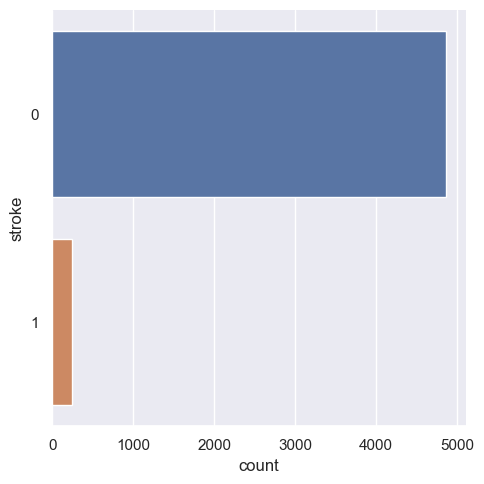

In [7]:
sb.catplot(y="stroke", data=stroke_data, kind="count")

In [8]:
count1, count0 = stroke_data['stroke'].value_counts()
print("Ratio of classes is 1 : 0 = ", count1, ":", count0)

Ratio of classes is 1 : 0 =  4861 : 249


The class imbalance in the 'stroke' variable, with a ratio of 4861 (class 0: no stroke) to 249 (class 1: stroke), can lead to some problems in Classification model but we will try to improve it later.

In [9]:
# Numeric predictors
stroke_data[['age', 'avg_glucose_level', 'bmi']].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [10]:
# Categorical predictors
stroke_data[['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']].describe()

,hypertension,heart_disease
count,5110.000000,5110.000000
mean,0.097456,0.054012
std,0.296607,0.226063
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [11]:
categorical_vars = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for var in categorical_vars:
    print(f"Frequency count for {var}:")
    print(stroke_data[var].value_counts())
    print("\n")


Frequency count for gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Frequency count for ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64


Frequency count for work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Frequency count for Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


Frequency count for smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64




Observation: 
- The majority of the participants are female, and there is a higher number of married individuals compared to those who have never been married.
- Most participants work in the private sector, with self-employed, government jobs, and children following in descending order. A small fraction has never worked.
- Participants are almost evenly distributed between urban and rural residence types, with slightly more individuals living in urban areas.
- The average age of participants is approximately 43 years, ranging from less than a year to 82 years old.
- Hypertension and heart disease are not very common among the participants, with a prevalence of 9.7% and 5.4%, respectively.
- The average glucose level is about 106 mg/dL, while the average BMI is approximately 28.9, which falls into the "overweight" category.
- The majority of participants are either non-smokers or have an unknown smoking status, with a smaller portion being former smokers or current smokers. 

In [12]:
correlations = stroke_data.corr()
print(correlations['stroke'])

id                   0.006388
age                  0.245257
hypertension         0.127904
heart_disease        0.134914
avg_glucose_level    0.131945
bmi                  0.042374
stroke               1.000000
Name: stroke, dtype: float64


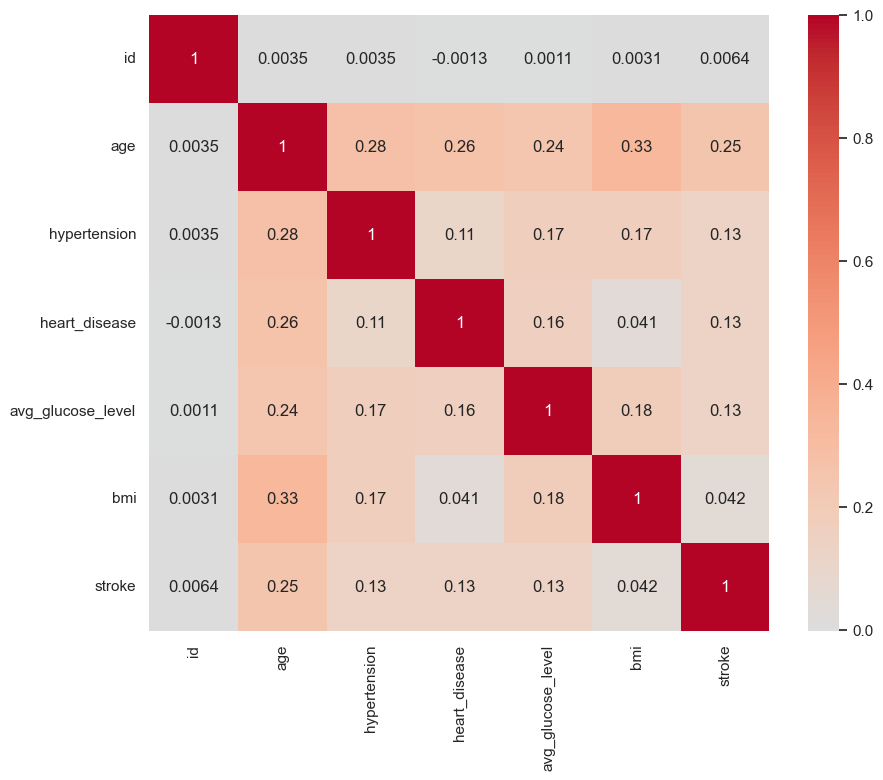

In [13]:
plt.figure(figsize=(10, 8))
sb.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.show()


In [16]:
from scipy.stats import chi2_contingency

categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for column in categorical_columns:
    contingency_table = pd.crosstab(stroke_data[column], stroke_data['stroke'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"{column}: Chi2 = {chi2:.2f}, p-value = {p_value:.5f}")

gender: Chi2 = 0.47, p-value = 0.78955
ever_married: Chi2 = 58.92, p-value = 0.00000
work_type: Chi2 = 49.16, p-value = 0.00000
Residence_type: Chi2 = 1.08, p-value = 0.29833
smoking_status: Chi2 = 29.15, p-value = 0.00000


<Figure size 800x400 with 0 Axes>

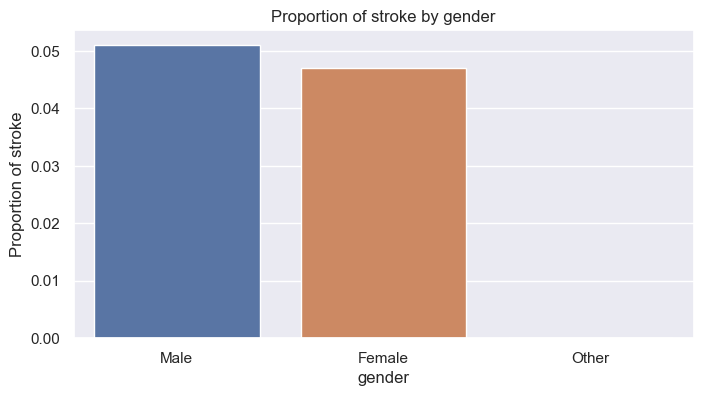

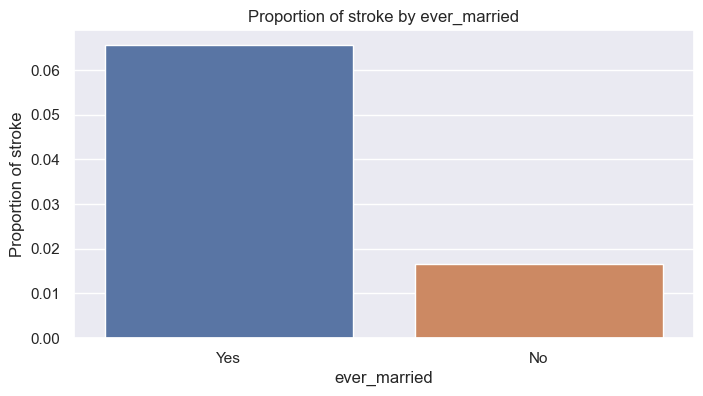

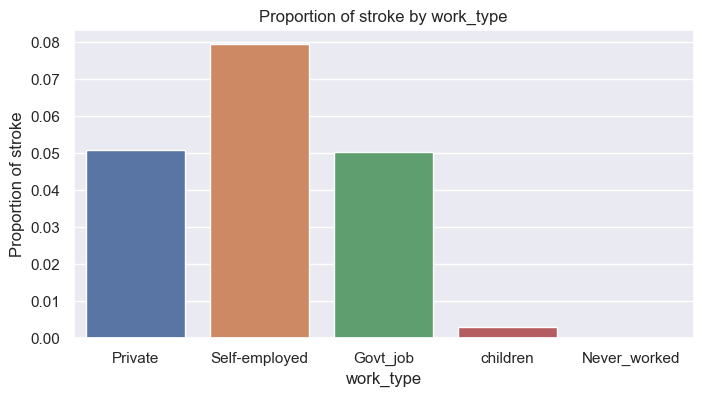

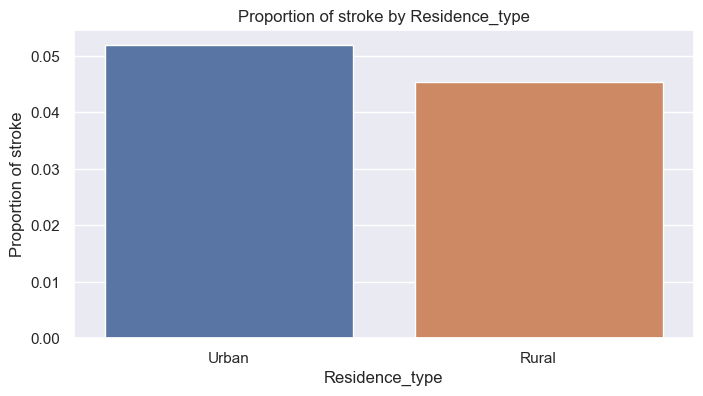

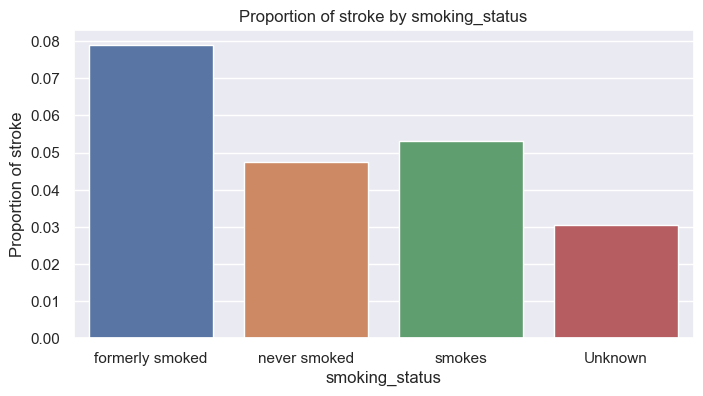

In [18]:
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sb.barplot(x=column, y='stroke', data=stroke_data, ci=None)
    plt.title(f"Proportion of stroke by {column}")
    plt.ylabel("Proportion of stroke")
    plt.show()

#### Based on the correlation matrix and the chi-squared test results, you can observe the following:

- For the numeric variables, age has the strongest correlation with stroke (0.245), followed by hypertension (0.128), heart_disease (0.135), and avg_glucose_level (0.132). bmi has a weak correlation (0.042) with stroke.

- For the categorical variables, ever_married, work_type, and smoking_status have significant associations with stroke, as indicated by their low p-values (p < 0.05). gender and Residence_type do not show a significant association with stroke, given their higher p-values (p > 0.05).

##### Taking these results into account, the variables that seem to impact stroke the most are age, hypertension, heart_disease, avg_glucose_level, ever_married, work_type, and smoking_status. It's important to note that correlation and association do not imply causation, so further analysis, such as logistic regression or other modeling techniques, may be required to better understand the relationships between these variables and stroke occurrence.

From there, we will focus only on variables: age, hypertension, heart_disease, avg_glucose_level, ever_married, work_type, and smoking_status as it has higher associations compared to other variables.

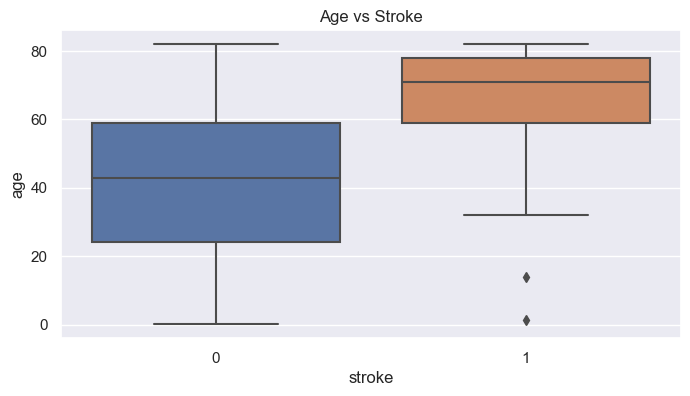

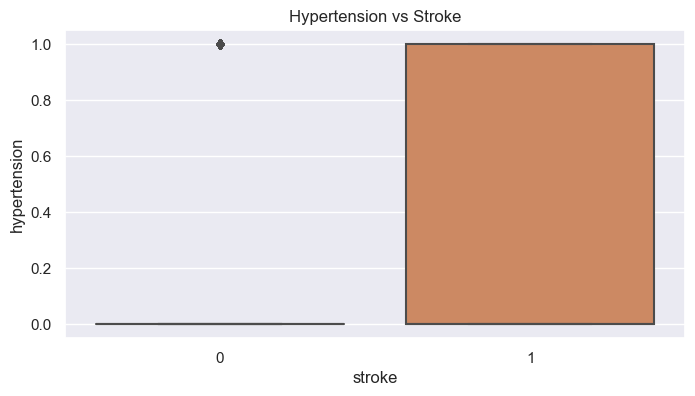

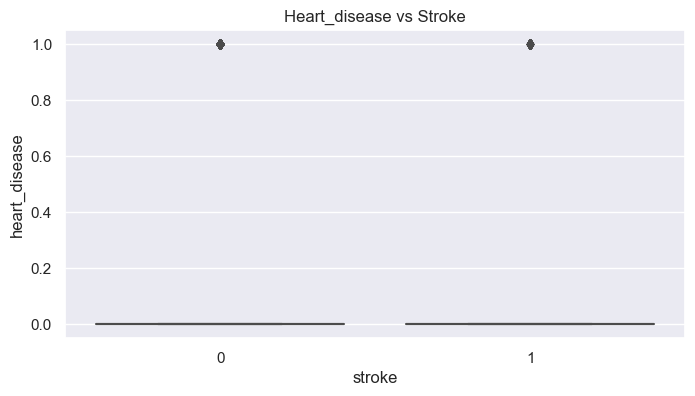

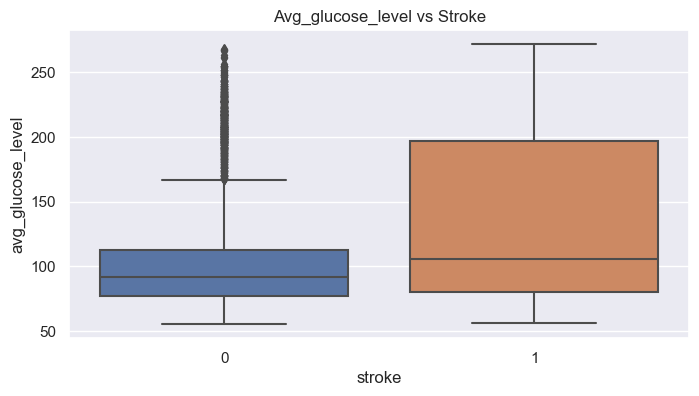

In [19]:

# Numeric variables
numeric_vars = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level']
for var in numeric_vars:
    plt.figure(figsize=(8, 4))
    sb.boxplot(x='stroke', y=var, data=stroke_data)
    plt.title(f'{var.capitalize()} vs Stroke')
    plt.show()


<Figure size 800x400 with 0 Axes>

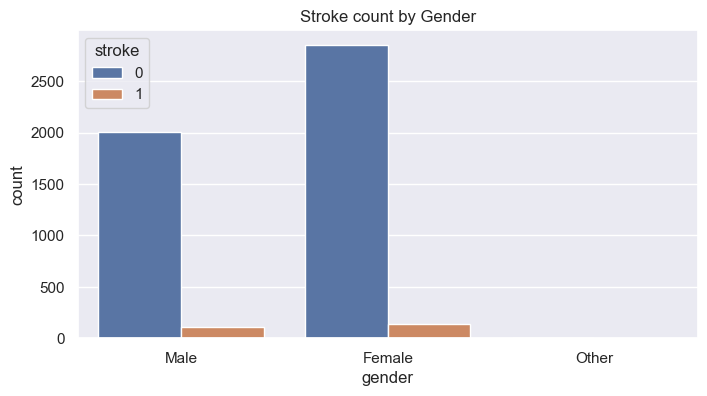

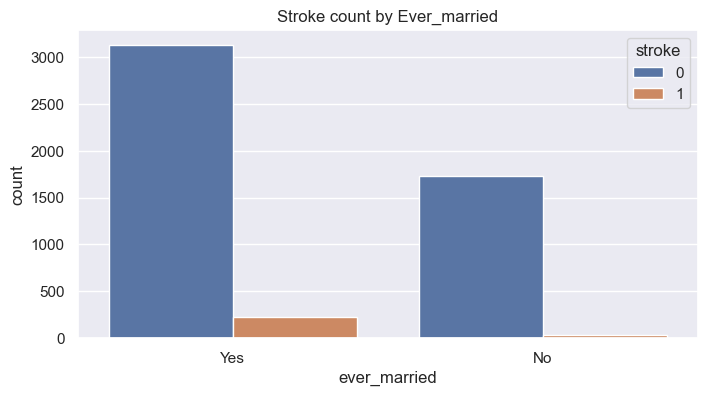

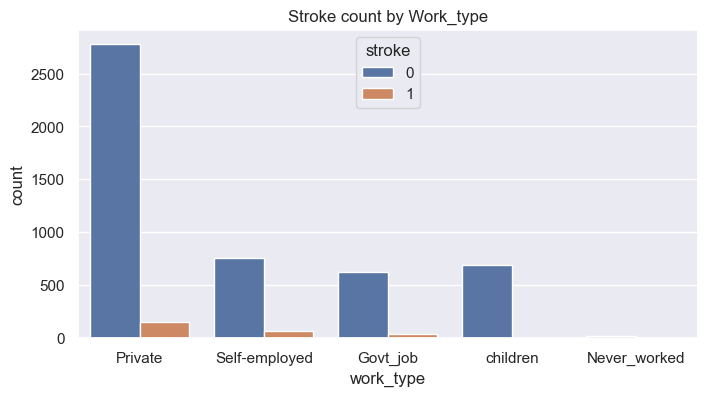

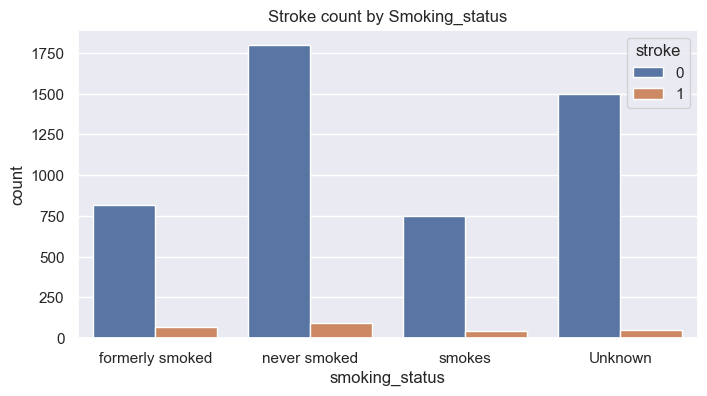

In [21]:

# Categorical variables
categorical_vars = ['gender', 'ever_married', 'work_type', 'smoking_status']
for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sb.countplot(x=var, hue='stroke', data=stroke_data)
    plt.title(f'Stroke count by {var.capitalize()}')
    plt.show()

In [22]:
gender_stroke_count = stroke_data.groupby(['gender', 'stroke']).size().unstack()
gender_stroke_ratio = gender_stroke_count.div(gender_stroke_count.sum(axis=1), axis=0)

print(gender_stroke_ratio)

stroke         0         1
gender                    
Female  0.952906  0.047094
Male    0.948936  0.051064
Other   1.000000       NaN


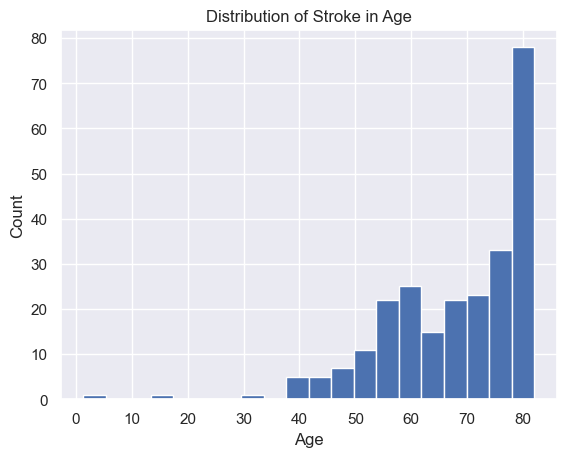

In [26]:
plt.hist(stroke_data['age'][stroke_data['stroke']==1], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Stroke in Age')
plt.show()